<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

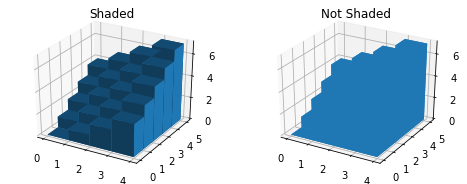

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()

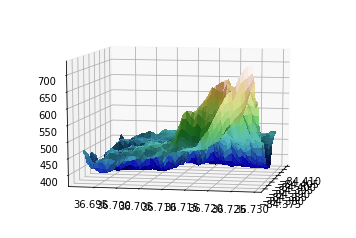

In [30]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Load and format data
filename = cbook.get_sample_data('jacksboro_fault_dem.npz', asfileobj=False)
with np.load(filename) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)
ax.view_init(elev=10., azim=11) 
plt.show()

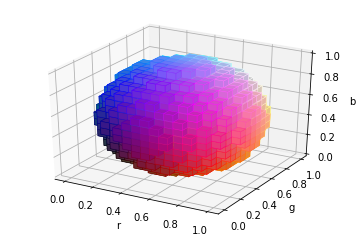

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, g, b = np.indices((17, 17, 17)) / 16.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

# define a sphere about [0.5, 0.5, 0.5]
sphere = (rc - 0.5)**2 + (gc - 0.5)**2 + (bc - 0.5)**2 < 0.5**2

# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(r, g, b, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)
ax.set(xlabel='r', ylabel='g', zlabel='b')

plt.show()

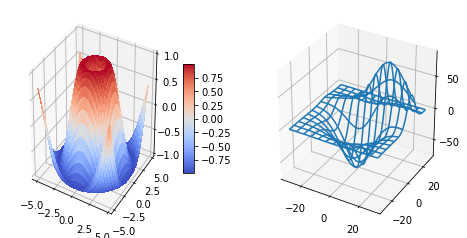

In [27]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

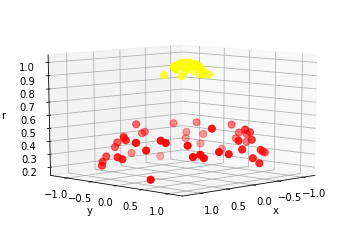

In [29]:
from sklearn.datasets.samples_generator import make_circles
data,target=make_circles(100,factor=0.1,noise=0.1)
from mpl_toolkits import mplot3d
r=np.exp(-(data**2).sum(1))#e^(data[0]^2+data[1])^2) ，sum(1)中的1表示表示 axis=1,沿着行的方向求和
def plot_3D(elev=30,azim=30,X=data,y=target):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(data[:,0],data[:,1],r,c=target,s=50,cmap='autumn')
    ax.view_init(elev=elev,azim=azim)#改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
plot_3D(elev=10, azim=45,X=data,y=target) 


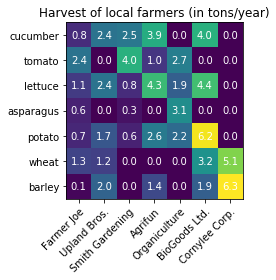

In [31]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


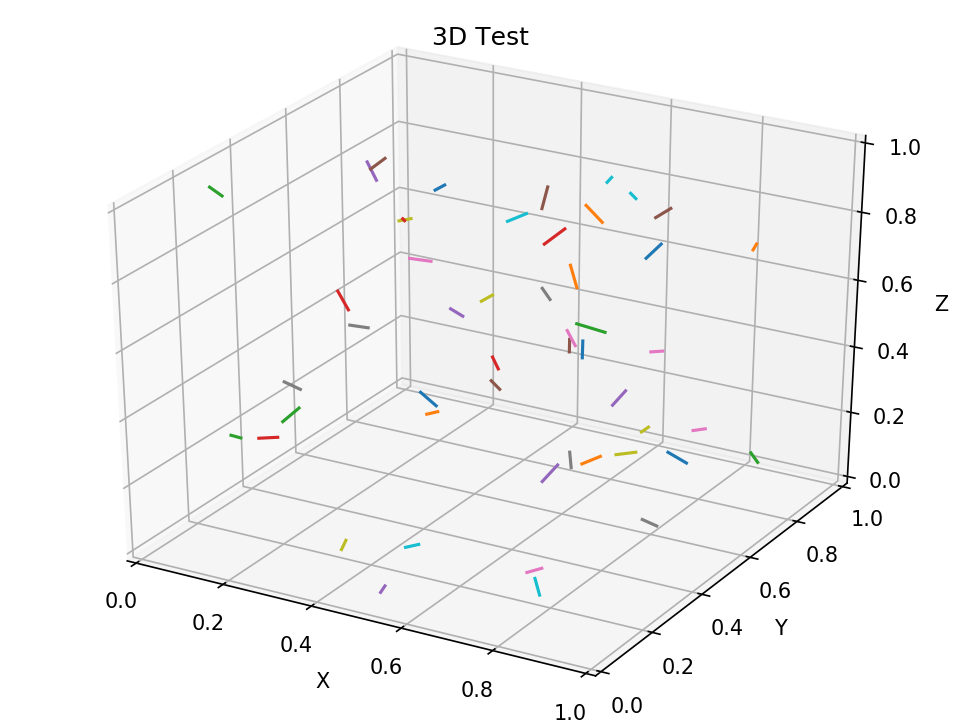

In [1]:
# 指定渲染环境
%matplotlib notebook
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()

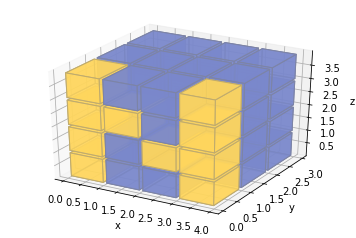

In [8]:
# 指定渲染环境
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

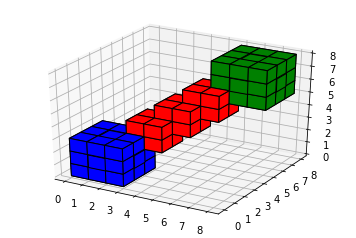

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between them
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxels = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(voxels.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k')

plt.show()

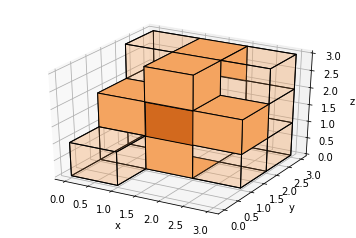

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

voxels = np.array([[[1,0,0],
                   [1,1,0],
                   [1,1,1]],
                  [[0,0,0],
                   [1,1,1],
                   [1,1,1]],
                  [[0,0,0],
                   [1,1,0],
                   [1,1,1]]])

# set the colors of each object
SandyBrown = '#F4A46033'
Sandy = '#F4A460'
Chocolate = '#D2691E'
colors = np.empty(voxels.shape, dtype=object)
colors[0] = np.array([[SandyBrown,0,0],
                      [SandyBrown,Sandy,0],
                      [SandyBrown,SandyBrown,SandyBrown]])
colors[1] = np.array([[0,SandyBrown,0],
                      [Sandy,Chocolate,Sandy],
                      [SandyBrown,SandyBrown,Sandy]])
colors[2] = np.array([[SandyBrown,0,0],
                      [SandyBrown,Sandy,0],
                      [SandyBrown,SandyBrown,SandyBrown]])


# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors,edgecolor='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [42]:
colors[0]

array([['#F4A46080', '#F4A46080', '#F4A46080'],
       ['#F4A46080', '#F4A46080', '#F4A46080'],
       ['#F4A46080', '#F4A46080', '#F4A46080']], dtype=object)

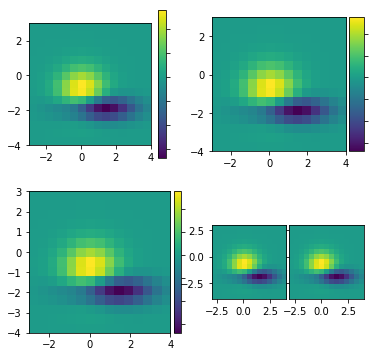

In [3]:
import matplotlib.pyplot as plt


def get_demo_image():
    import numpy as np
    from matplotlib.cbook import get_sample_data
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)


def demo_simple_image(ax):
    Z, extent = get_demo_image()

    im = ax.imshow(Z, extent=extent, interpolation="nearest")
    cb = plt.colorbar(im)
    plt.setp(cb.ax.get_yticklabels(), visible=False)


def demo_locatable_axes_hard(fig1):

    from mpl_toolkits.axes_grid1 import SubplotDivider, Size
    from mpl_toolkits.axes_grid1.mpl_axes import Axes

    divider = SubplotDivider(fig1, 2, 2, 2, aspect=True)

    # axes for image
    ax = Axes(fig1, divider.get_position())

    # axes for colorbar
    ax_cb = Axes(fig1, divider.get_position())

    h = [Size.AxesX(ax),  # main axes
         Size.Fixed(0.05),  # padding, 0.1 inch
         Size.Fixed(0.2),  # colorbar, 0.3 inch
         ]

    v = [Size.AxesY(ax)]

    divider.set_horizontal(h)
    divider.set_vertical(v)

    ax.set_axes_locator(divider.new_locator(nx=0, ny=0))
    ax_cb.set_axes_locator(divider.new_locator(nx=2, ny=0))

    fig1.add_axes(ax)
    fig1.add_axes(ax_cb)

    ax_cb.axis["left"].toggle(all=False)
    ax_cb.axis["right"].toggle(ticks=True)

    Z, extent = get_demo_image()

    im = ax.imshow(Z, extent=extent, interpolation="nearest")
    plt.colorbar(im, cax=ax_cb)
    plt.setp(ax_cb.get_yticklabels(), visible=False)


def demo_locatable_axes_easy(ax):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    divider = make_axes_locatable(ax)

    ax_cb = divider.new_horizontal(size="5%", pad=0.05)
    fig1 = ax.get_figure()
    fig1.add_axes(ax_cb)

    Z, extent = get_demo_image()
    im = ax.imshow(Z, extent=extent, interpolation="nearest")

    plt.colorbar(im, cax=ax_cb)
    ax_cb.yaxis.tick_right()
    ax_cb.yaxis.set_tick_params(labelright=False)


def demo_images_side_by_side(ax):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    divider = make_axes_locatable(ax)

    Z, extent = get_demo_image()
    ax2 = divider.new_horizontal(size="100%", pad=0.05)
    fig1 = ax.get_figure()
    fig1.add_axes(ax2)

    ax.imshow(Z, extent=extent, interpolation="nearest")
    ax2.imshow(Z, extent=extent, interpolation="nearest")
    ax2.yaxis.set_tick_params(labelleft=False)


def demo():

    fig1 = plt.figure(1, (6, 6))
    fig1.clf()

    # PLOT 1
    # simple image & colorbar
    ax = fig1.add_subplot(2, 2, 1)
    demo_simple_image(ax)

    # PLOT 2
    # image and colorbar whose location is adjusted in the drawing time.
    # a hard way

    demo_locatable_axes_hard(fig1)

    # PLOT 3
    # image and colorbar whose location is adjusted in the drawing time.
    # a easy way

    ax = fig1.add_subplot(2, 2, 3)
    demo_locatable_axes_easy(ax)

    # PLOT 4
    # two images side by side with fixed padding.

    ax = fig1.add_subplot(2, 2, 4)
    demo_images_side_by_side(ax)

    plt.show()


demo()

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
data = pd.read_excel('fake_data.xlsx')
data.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,最优,14519,13344,12406,11539,10718,9921,9165,8439,7749,...,1960,1553,1354,1184,1036,878,722,589,460,326
1,圆锥,15563,14233,12812,11530,10285,9134,8070,7058,6122,...,173,72,18,2,0,0,0,0,0,0
2,凸曲线,14981,13857,12471,11146,9869,8632,7507,6440,5458,...,0,0,0,0,0,0,0,0,0,0
3,圆台,14856,14039,12970,11804,10551,9431,8219,7029,5896,...,0,0,0,0,0,0,0,0,0,0
4,立方体,15000,14679,14049,13080,11826,10547,9174,7949,6753,...,0,0,0,0,0,0,0,0,0,0


In [50]:
data2=data.iloc[:,1:]

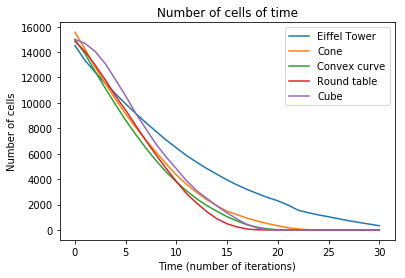

In [51]:
x=np.linspace(0,30,31)
plt.plot(x,data2.iloc[0,:])
plt.plot(x,data2.iloc[1,:])
plt.plot(x,data2.iloc[2,:])
plt.plot(x,data2.iloc[3,:])
plt.plot(x,data2.iloc[4,:])
plt.legend(['Eiffel Tower','Cone','Convex curve','Round table','Cube'])
plt.xlabel('Time (number of iterations)')
plt.ylabel('Number of cells')
plt.title('Number of cells of time')
plt.savefig('Number of cells of time.png')

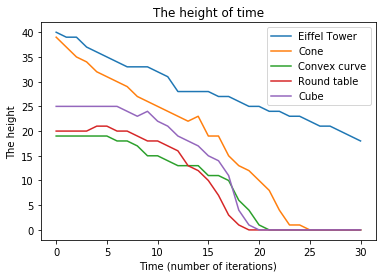

In [52]:
x=np.linspace(0,30,31)
plt.plot(x,data2.iloc[5,:])
plt.plot(x,data2.iloc[6,:])
plt.plot(x,data2.iloc[7,:])
plt.plot(x,data2.iloc[8,:])
plt.plot(x,data2.iloc[9,:])
plt.legend(['Eiffel Tower','Cone','Convex curve','Round table','Cube'])
plt.xlabel('Time (number of iterations)')
plt.ylabel('The height')
plt.title('The height of time')
plt.savefig('The height of time.png')

In [56]:
x=np.linspace(0,1,100)
a=1.5
b=2
def y_fun(x,a):
    if a*np.log(x+0.01) > 0:
        return  a*np.log(x+0.01)
    else:
        return 0

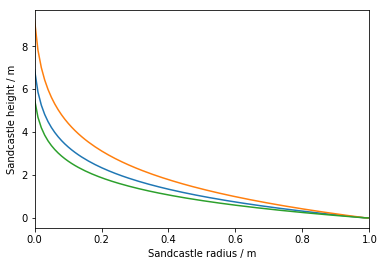

In [67]:
y1=[]
y2=[]
y3=[]
for i in x:
    y1.append(y_fun(i,-1.5))
    y2.append(y_fun(i,-2))
    y3.append(y_fun(i,-1.2))
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.xlim(0,1)
plt.xlabel('Sandcastle radius / m')
plt.ylabel('Sandcastle height / m')
plt.savefig('Sensitivity 1.png')

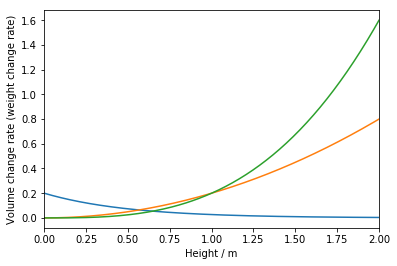

In [68]:
import math
x=np.linspace(0,2,200)
def y1_fun(x):
    return 0.2*np.exp(-2*x)
def y2_fun(x):
    return 0.2*x*x
def y3_fun(x):
    return 0.2*math.pow(x,3)
y1=[]
y2=[]
y3=[]
for i in x:
    y1.append(y1_fun(i))
    y2.append(y2_fun(i))
    y3.append(y3_fun(i))
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.xlim(0,2)
plt.xlabel('Height / m')
plt.ylabel('Volume change rate (weight change rate)')
plt.savefig('Sensitivity 2.png')

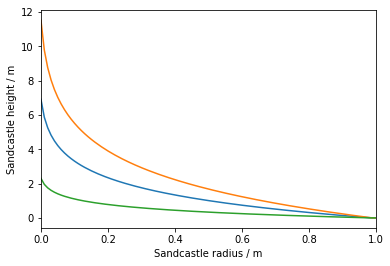

In [71]:
y1=[]
y2=[]
y3=[]
for i in x:
    y1.append(y_fun(i,-1.5))
    y2.append(y_fun(i,-2.5))
    y3.append(y_fun(i,-0.5))
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.xlim(0,1)
plt.xlabel('Sandcastle radius / m')
plt.ylabel('Sandcastle height / m')
plt.savefig('Sensitivity 3.png')

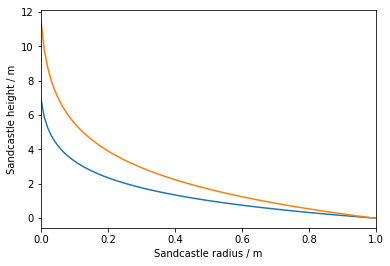

In [72]:
y1=[]
y2=[]
y3=[]
for i in x:
    y1.append(y_fun(i,-1.5))
    y2.append(y_fun(i,-2.5))
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlim(0,1)
plt.xlabel('Sandcastle radius / m')
plt.ylabel('Sandcastle height / m')
plt.savefig('Sensitivity 4.png')